In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import pathlib
from utils import *

# Process results

In [3]:
data_path = pathlib.Path('/home/users/bjornmik/datasets/sweep_3/')

In [4]:
data_df = pd.read_csv(data_path / 'summary.csv').drop(['Unnamed: 0'],axis=1)

In [5]:
data_df.loc[0,['x1', 'x2', 'y1', 'y2', 'z1', 'z2']]

x1    11.0
x2    13.0
y1    12.0
y2    14.0
z1     9.0
z2    11.0
Name: 0, dtype: object

In [6]:
error_trials = compute_error_trials(data_path)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [7]:
errors = compute_errors(data_path)

  0%|          | 0/10 [00:00<?, ?it/s]

In [8]:
errors = compute_error_confidence(errors, error_trials)

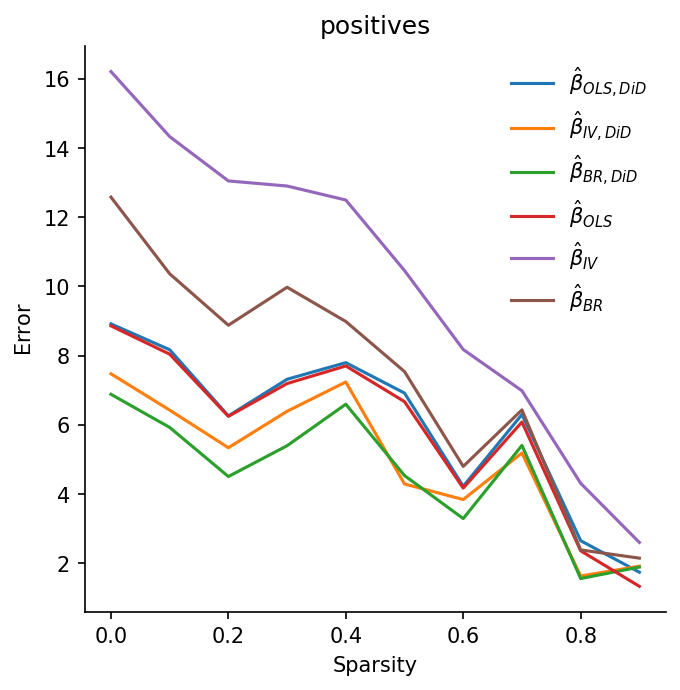

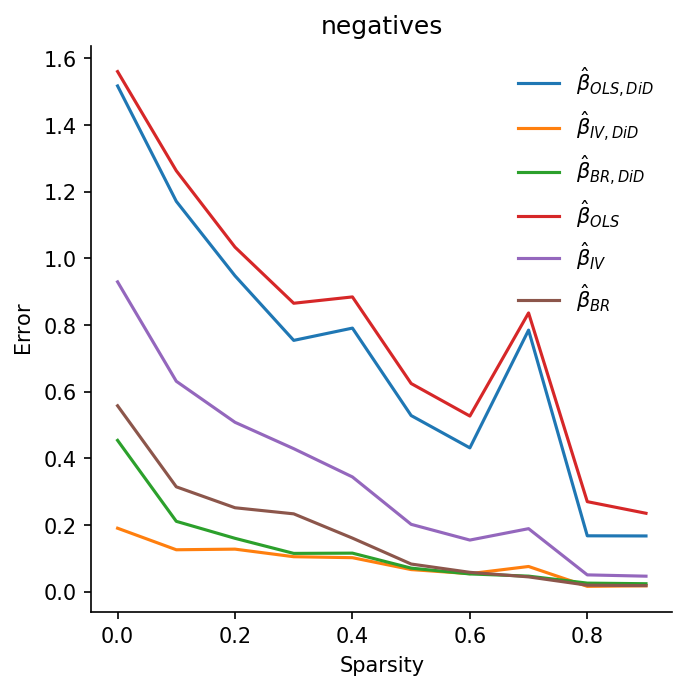

In [9]:
plot_errors(errors, 'sparsity')

In [10]:
errors['positives'][['sparsity', 'error_ols_iv_did_pval', 'error_ols_iv_did_statistic']]

,sparsity,error_ols_iv_did_pval,error_ols_iv_did_statistic
0,0.2,3.896560e-18,0.0
1,0.1,3.896560e-18,0.0
2,0.9,3.896560e-18,0.0
3,0.7,3.896560e-18,0.0
4,0.6,3.896560e-18,0.0
5,0.5,3.896560e-18,0.0
6,0.8,3.896560e-18,0.0
7,0.0,3.896560e-18,0.0
8,0.4,3.896560e-18,0.0
9,0.3,3.896560e-18,0.0


In [11]:
errors['negatives'][['sparsity', 'error_ols_iv_did_pval', 'error_ols_iv_did_statistic']]

,sparsity,error_ols_iv_did_pval,error_ols_iv_did_statistic
0,0.2,3.896560e-18,0.0
1,0.1,3.896560e-18,0.0
2,0.9,3.896560e-18,0.0
3,0.7,3.896560e-18,0.0
4,0.6,3.896560e-18,0.0
5,0.5,3.896560e-18,0.0
6,0.8,3.896560e-18,0.0
7,0.0,3.896560e-18,0.0
8,0.4,3.896560e-18,0.0
9,0.3,3.896560e-18,0.0


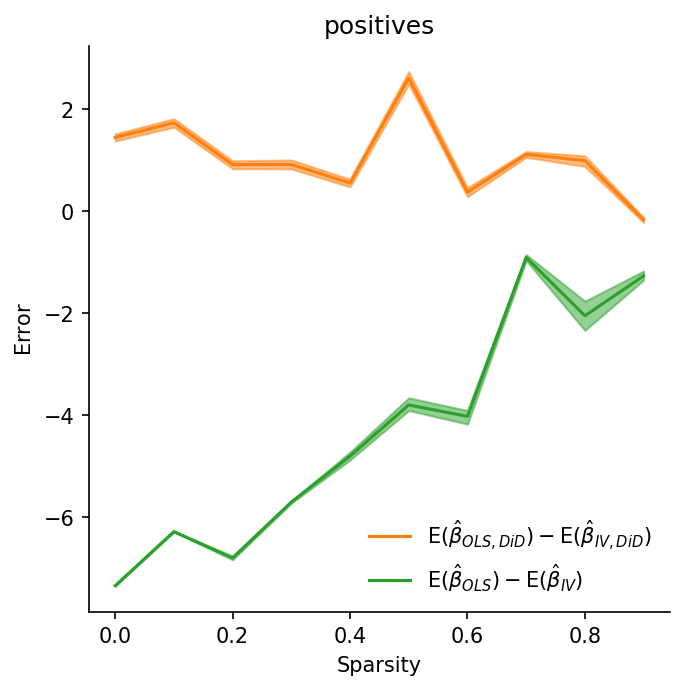

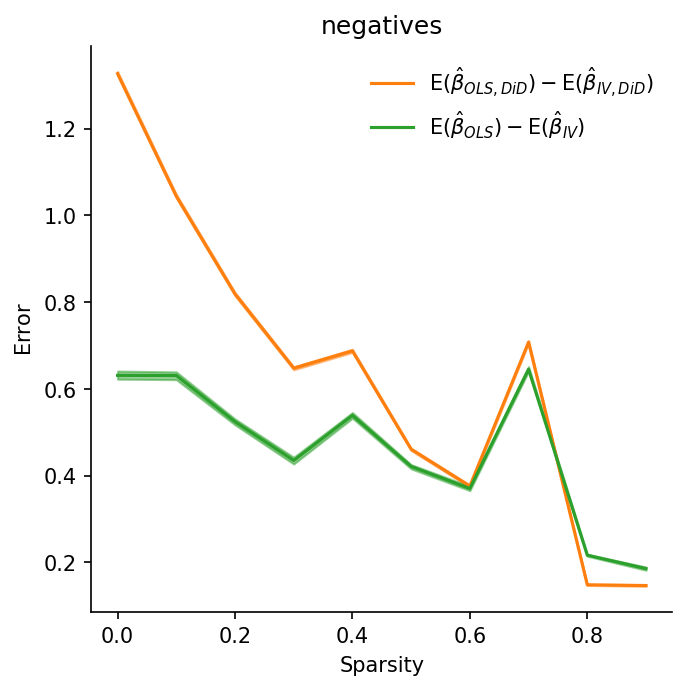

In [12]:
plot_error_difference(errors, 'sparsity')

# Convergence

In [13]:
error_convergence = compute_error_convergence(data_path)

  0%|          | 0/8160 [00:00<?, ?it/s]

In [14]:
error_convergence_trials = compute_error_convergence_trials(data_path)

  0%|          | 0/15000 [00:00<?, ?it/s]

/home/users/bjornmik/causal-optoconnectics/causal_optoconnectics/core.py:228: RuntimeWarning: invalid value encountered in true_divide
  y_refractory = np.divide(self.yz_sum, self.z_sum)
/home/users/bjornmik/causal-optoconnectics/causal_optoconnectics/core.py:230: RuntimeWarning: invalid value encountered in true_divide
  y_response_norefractory = np.divide(self.yzinv_sum, self.zinv_sum)
/home/users/bjornmik/causal-optoconnectics/causal_optoconnectics/core.py:234: RuntimeWarning: invalid value encountered in true_divide
  x_response_norefractory = np.divide(self.xzinv_sum, self.zinv_sum)
/home/users/bjornmik/causal-optoconnectics/causal_optoconnectics/core.py:236: RuntimeWarning: invalid value encountered in true_divide
  y_response_spike = np.divide(self.yx_sum, self.x_sum)
/home/users/bjornmik/causal-optoconnectics/causal_optoconnectics/core.py:238: RuntimeWarning: invalid value encountered in true_divide
  y_nospike = np.divide(self.yxinv_sum, self.xinv_sum)
/home/users/bjornmik/cau

In [15]:
samples = compute_all_samples(data_path)

  0%|          | 0/10 [00:00<?, ?it/s]

In [60]:
index = int(errors['positives'].query('sparsity==0.9').index.values)
index

2

In [61]:
errors['positives'].loc[index]

path                          /home/users/bjornmik/datasets/sweep_3/sparsity_09
const                                                                       5.0
n_neurons                                                                  50.0
n_stim                                                                      5.0
dt                                                                        0.001
ref_scale                                                                  10.0
abs_ref_scale                                                               3.0
spike_scale                                                                 5.0
abs_ref_strength                                                         -100.0
rel_ref_strength                                                          -30.0
stim_scale                                                                  2.0
stim_strength                                                               6.0
stim_period                             

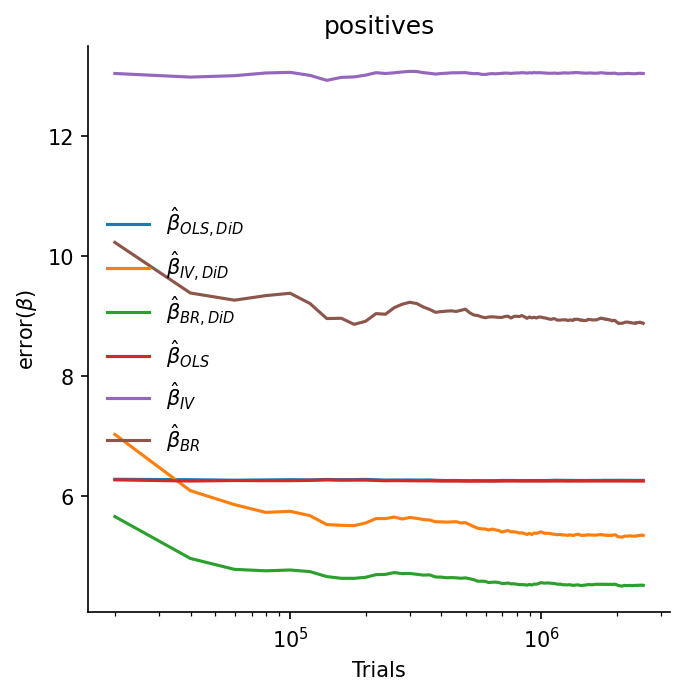

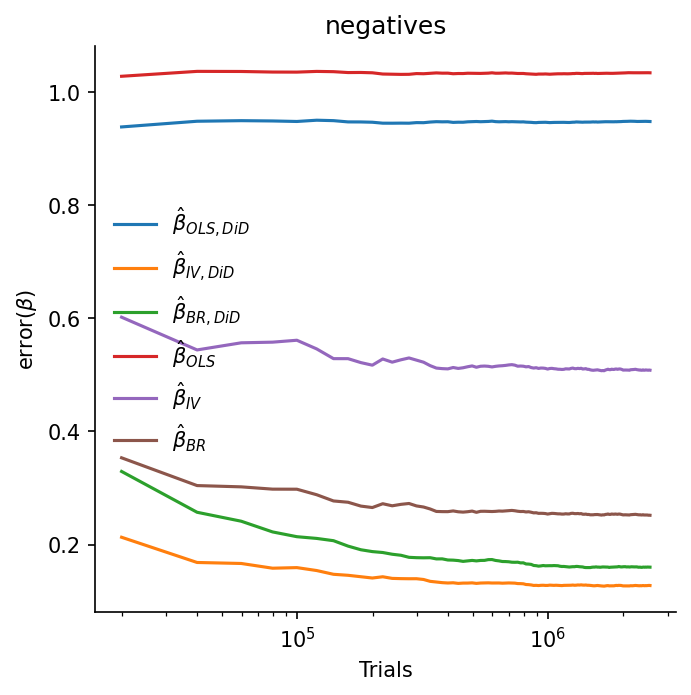

In [18]:
plot_error_convergence(error_convergence, index)

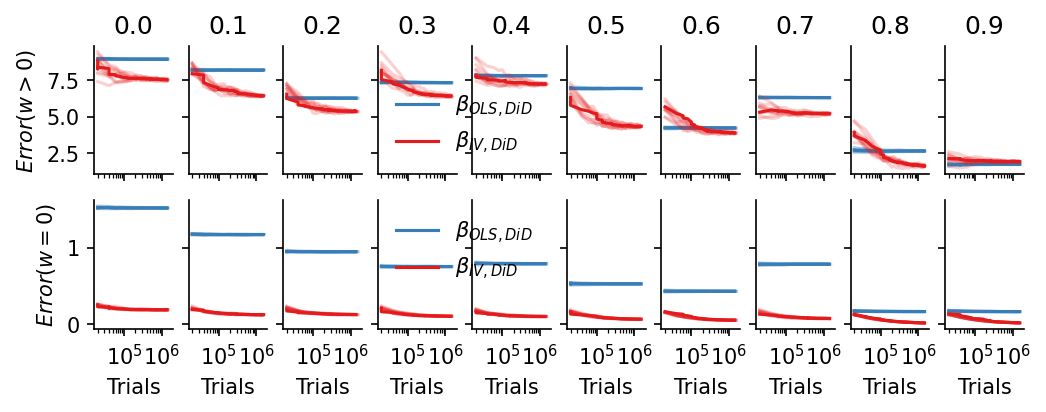

In [52]:
fig, axs = plt.subplots(2, 10, sharex=True, sharey='row', figsize=(8,2.5), dpi=150)
for i, (sparsity, df) in enumerate(errors['positives'].groupby('sparsity')):
    index = int(df.index.values)
    plot_error_convergence_trials( 
        error_convergence_trials, 
        index, 
        keys=['error_beta_ols_did','error_beta_iv_did'], 
        axs=axs.T[i], legend=i==4, xlabels=(False,True), ylabels=[i==0]*2)
    axs[0,i].set_title(f'{sparsity:.1f}')
savefig('sparsity_convergence')

# Regression

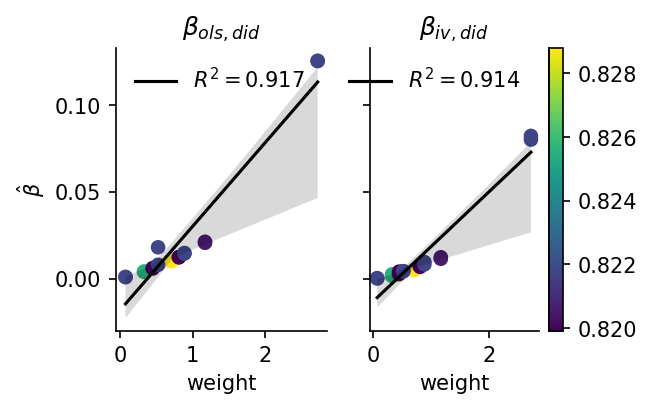

In [62]:
plot_regression(samples, index, ['beta_ols_did','beta_iv_did'])

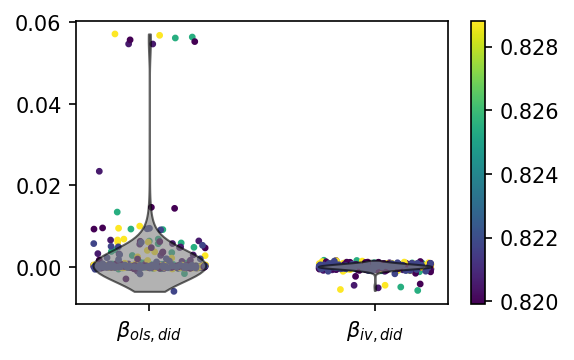

In [63]:
plot_false_positives(samples, index, ['beta_ols_did', 'beta_iv_did'])